In [2]:
#분석서버: google의 colab, 저장서버: 구글드라이브
#from google.colab import drive
#drive.mount("/content/gdrive/")

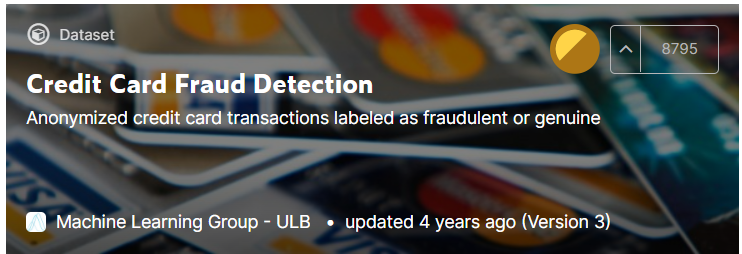

ref) https://www.kaggle.com/mlg-ulb/creditcardfraud

### 1. Data Load

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
os.getcwd()

'C:\\AI\\Python 3.8\\venv\\comp\\credit_k'

In [5]:
df= pd.read_csv('./dataset/creditcard.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 2. EDA

### class

In [11]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

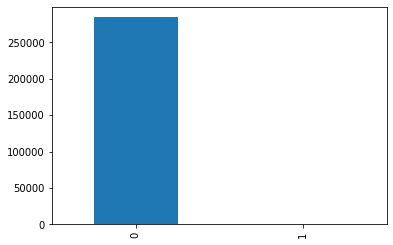

In [12]:
df['Class'].value_counts().plot(kind='bar')
plt.show()

___________________________________

#### 다중공선성

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif_factor']= [variance_inflation_factor(df.values, i) 
                    for i in range(df.shape[1])]

vif['feature'] = df.columns
vif = vif.sort_values('vif_factor').reset_index(drop=True)
# drop=True 옵션을 지정해주면 인덱스로 지정은 하되, 기존열을 남겨놓는다.
vif

,vif_factor,feature
0,1.000539,V26
1,1.000773,V24
2,1.001595,V28
3,1.003473,V13
4,1.009509,V27
5,1.013526,V25
6,1.014148,V15
7,1.033900,V18
8,1.037715,V9
9,1.040800,V19


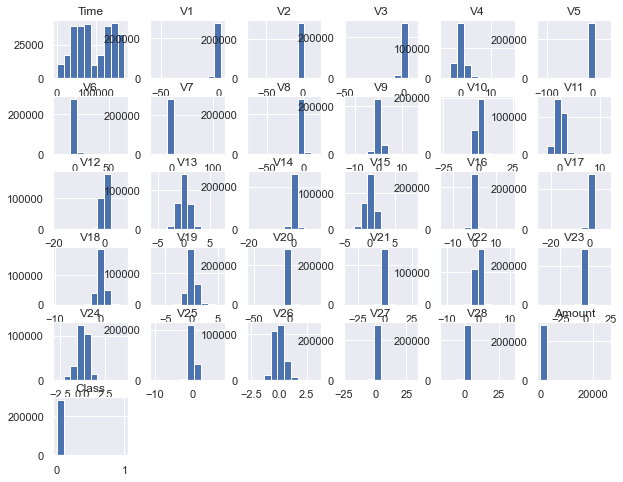

In [14]:
sns.set()
#plt.figure(figsize=(16,10))
df.hist(figsize=(10,8))
plt.show()

- 그룹 내에서 값이 큰 순으로 상위 n개만 가져올 때: nlargest
- 그룹 내에서 값이 작은 순으로 상위 n개만 가져올 때: nsmallest

In [15]:
df[df.columns].corr().nlargest(5,'Class')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Class,-0.012323,-1.013473e-01,9.128865e-02,-1.929608e-01,1.334475e-01,-9.497430e-02,-4.364316e-02,-1.872566e-01,1.987512e-02,-9.773269e-02,...,4.041338e-02,8.053175e-04,-2.685156e-03,-7.220907e-03,3.307706e-03,4.455398e-03,1.757973e-02,9.536041e-03,0.005632,1.000000
V11,-0.247689,2.125498e-16,1.975426e-16,1.576830e-15,3.459380e-16,7.203963e-16,1.980503e-15,1.425248e-16,2.487043e-16,1.354680e-16,...,-5.658364e-16,7.772895e-16,-4.505332e-16,1.933267e-15,-5.600475e-16,-1.003221e-16,-2.640281e-16,-3.792314e-16,0.000104,0.154876
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V21,0.044736,-2.457409e-16,-8.480447e-17,5.706192e-17,-1.949553e-16,-3.920976e-16,5.833316e-17,-2.027779e-16,3.892798e-16,1.936953e-16,...,1.000000e+00,3.649908e-15,8.119580e-16,1.761054e-16,-1.686082e-16,-5.557329e-16,-1.211281e-15,5.278775e-16,0.105999,0.040413


In [16]:
df[df.columns].corr().nsmallest(5,'Class')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V17,-0.073297,-3.879840e-16,-2.685296e-16,7.614712e-16,-2.699612e-16,1.281914e-16,2.015618e-16,2.177192e-16,-2.269549e-16,1.113695e-15,...,-8.230527e-16,-8.743398e-16,3.706214e-16,-2.403828e-16,2.666806e-16,6.932833e-16,6.148525e-16,-5.534540e-17,0.007309,-0.326481
V14,-0.098757,-5.020280e-16,-1.730566e-16,4.739859e-16,2.282280e-16,6.565143e-16,2.621312e-16,2.607772e-16,-8.599156e-16,3.784757e-15,...,-3.356561e-16,3.740383e-16,3.883204e-16,2.003482e-16,-8.547932e-16,-1.660327e-16,1.044274e-16,2.289427e-15,0.033751,-0.302544
V12,0.124348,2.053457e-16,-9.568710e-17,6.310231e-16,-5.625518e-16,7.412552e-16,2.375468e-16,-3.536655e-18,1.839891e-16,-1.079314e-15,...,7.300527e-16,1.644699e-16,1.800885e-16,4.436512e-16,-5.712973e-16,-2.359969e-16,-4.672391e-16,6.415167e-16,-0.009542,-0.260593
V10,0.030617,7.388135e-17,-3.991394e-16,1.156587e-15,2.232685e-16,-5.202306e-16,5.932243e-17,-7.492834e-17,-2.801370e-16,-4.642274e-16,...,1.177547e-15,-6.418202e-16,3.214491e-16,-1.355885e-16,-2.846052e-16,-3.028119e-16,-2.197977e-16,4.864782e-17,-0.101502,-0.216883
V16,0.011903,7.212815e-17,1.177316e-17,8.299445e-16,-9.614528e-16,2.246261e-15,2.623672e-18,5.869302e-17,-5.254741e-16,-1.214086e-15,...,-4.715090e-16,-7.923387e-17,5.020770e-16,-3.005985e-16,-1.345418e-15,-7.290010e-16,6.789513e-16,7.588849e-16,-0.003910,-0.196539


### Time & Amount 

<AxesSubplot:xlabel='Amount', ylabel='Density'>

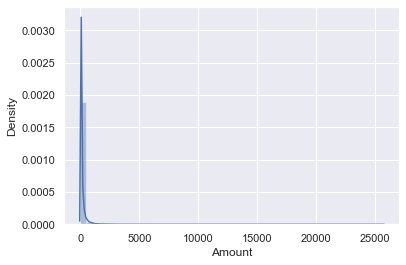

In [56]:
sns.distplot(df['Amount']) 


### 불균형 데이터 처리 (imbalanced data processing)

outlier, scaling 한 후에 PCA </br>
오버 샘플링 : KNN 해서 데이터 증폭, SMOTE </br>
언더 샘플링:  Nearmiss </br>

언더 샘플링을 하면 대체로 recall이 낮아지기 때문에, 현업에서는 오버 샘플링을 자주 한다.

In [25]:
X = X_test.copy()
y = y_test.copy()

In [26]:
print(X.shape, y.shape)

(56962, 28) (56962,)


#### 오버샘플링

(113728, 28) (113728,)
1    56864
0    56864
Name: Class, dtype: int64


<AxesSubplot:>

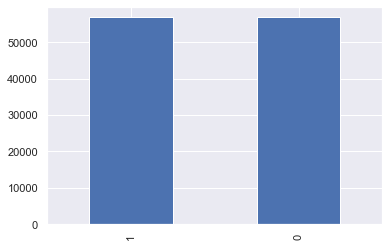

In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

smote = SMOTE(random_state=42)
over_X,over_y = smote.fit_resample(X,y)
print(over_X.shape,over_y.shape)  #데이터가 증폭됨

print(over_y.value_counts())
over_y.value_counts().plot(kind='bar')

#### 언더 샘플링 - 일반적으로 recall이 낮아짐 
- 재현율: 실제 사기인데, 정상인으로 예측함 > 카드사의 피해액이 커진다. 

(196, 28) (196,)
0    98
1    98
Name: Class, dtype: int64


<AxesSubplot:>

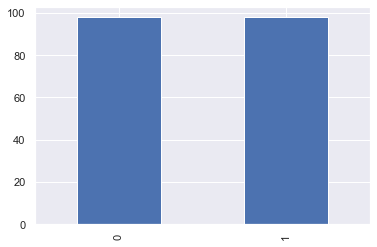

In [28]:
from imblearn.under_sampling import NearMiss
nearmiss= NearMiss()
under_X,under_y = nearmiss.fit_resample(X,y)
print(under_X.shape,under_y.shape)  

print(under_y.value_counts())
under_y.value_counts().plot(kind='bar')

____________________________________

### precision_recall_curve

In [ ]:
from sklearn.metrics import precision_recall_curve 

model = RandomForestClassifier()
model.fit(X_train, y_train)  
pred = model.predict(X_test)
proba= model.predict_proba(X_test)

precision,recall,th = precision_recall_curve(y_test,proba[:,1])
plt.plot(th,recall[:len(th)],label = 'precision')
plt.plot(th,recall[:len(th)],label = 'recall')
plt.xlabel('th')
plt.ylabel('score')
plt.legend()
plt.show()



### ROC CURVE

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import roc_auc_score,roc_curve 


model = RandomForestClassifier()
model.fit(X_train, y_train)  
pred = model.predict(X_test)
proba= model.predict_proba(X_test)

fpr,tpr,th = roc_curve(y_test,proba[:,1])

plt.xlabel('FPR-False Positive') 
plt.ylabel('TPR-True Positive ')
plt.plot(fpr,tpr,'red',label = 'rate')
plt.plot([0,1],[0,1],'blue',linestyle = '--',label = 'th0.5')
plt.title(f"auc score : {roc_auc_score(y_test,proba[:,1]):.4f}")
plt.legend()
plt.show()

auc=roc_auc_score(y_test,proba[:,1])
auc

_________________________________

## 이상치 제거
- 전체 프레임 대상이 아니라, 주요 feature 대상으로 진행

In [46]:
q1=X["V11"].quantile(q=0.25)
q3=X["V11"].quantile(q=0.75)
IQR = q3-q1
lower =q1-(1.5*IQR)
upper = q3+(1.5*IQR)
print(q1,q3,IQR,lower,upper)

#이상치를 제거하고자 한다면
#drop_idx = X[(X["V11"]<lower) | (X["V11"]>=upper)]["V11"].index.to_list()
#X["V11"].drop(drop_idx,axis=0,inplace=True)

-0.7624941955129775 0.739593407321606 1.5020876028345835 -3.015625599764853 2.9927248115734812


<AxesSubplot:xlabel='V11'>

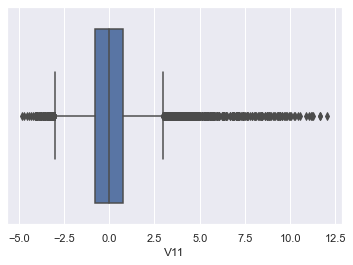

In [47]:
sns.boxplot(x=X["V11"])

In [49]:
X[(X['V11']<-4)|(X['V11']>7.5)]['V11'].count()

80

### 모델 생성 및 평가

In [29]:
from sklearn.model_selection import train_test_split
X= df.loc[:,'V1':'V28']
y = df['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(45569, 28) (11393, 28) (45569,) (11393,)


#### 로지스틱 회귀분석

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
lr=LogisticRegression(penalty='l2')
lr.fit(X_train,y_train) 
y_vld =lr.predict(X_test) 
f1_score = f1_score(y_test,y_vld,average='macro')
print(f'{f1_score:.4f}') 

0.8665


#### 랜덤포레스트

In [31]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100) 
rf.fit(X_train,y_train) 
y_vld =rf.predict(X_test)
f1_score = f1_score(y_test,y_vld,average='macro')
print(f"{f1_score:.4f}") 

0.9116


데이터가 워낙 깨끗하기 때문에, 점수가 높게 나옴.

### 모델 검증 및 튜닝

In [ ]:
acc = accuracy_score(y_test,y_vld)
precision = precision_score(y_test,y_vld)
recall = recall_score(y_test,y_vld)
f1 = f1_score(y_test,y_vld)

print(f"정확도 {acc:.4f} 정밀도 {precision:.4f} 재현률 {recall:.4f} f1 {f1:.4f}")


In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

skfold=StratifiedKFold(n_splits=5) #,shuffle=True,random_state=1234

f1_list=[]
for train_index,test_index in skfold.split(X,y): #X,y 둘 다 넣어야 함
    #X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ) 
    X_train,X_test= X.iloc[train_index],X.iloc[test_index]
    y_train,y_test= y.iloc[train_index],y.iloc[test_index]
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    f1 = f1_score(y_test,pred,average="macro")
    f1_list.append(f1)

# 평균값을 구할 때 array에선 바로 mean(), list에서는 array로 만든 후 mean
print(f1_list)
print(f" f1 평균점수 : {np.array(f1_list).mean():.4f}") 